In [1]:
#IMPORT LIBRARIES

import seaborn as sns
import numpy as np
import skimage.io
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.utils import Sequence
from keras.layers.core import Dense, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
#Create dictionary to easily understand classification
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

In [3]:
# create imagedatagenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#scale it
test_datagen = ImageDataGenerator(rescale=1./255)

#get training images from directory
itr = train_generator = train_datagen.flow_from_directory(
        'data/training',
        target_size=(28, 28),
        batch_size=60000,
        class_mode='binary')

#get testing images from directory
test = test_generator = test_datagen.flow_from_directory(
        'data/testing',
        target_size=(28,28),
        batch_size=10000,
        class_mode='binary')


Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [4]:
#iterate over images to set X and Y
X,Y = itr.next()

In [7]:
#convert to array
X = np.array(X)
Y = np.array(Y)

In [9]:
trainX, validationX, trainY, validationY = train_test_split(X,
                                Y, train_size=0.9, test_size=0.1, random_state = 0)


(54000, 28, 28, 3)

In [12]:
#iterate over images to set test X and test Y
testX, testY = test.next()

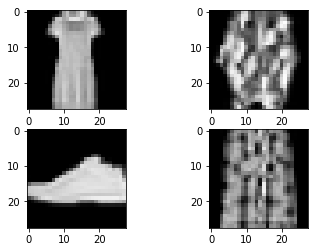

In [13]:
# plot 4 images as grayscale
plt.subplot(221)
plt.imshow(trainX[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(trainX[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(trainX[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(trainX[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [14]:
#scaling
trainX = trainX/255
validationX = validationX/255
testX = testX/255

#convert to categorical
trainY = np_utils.to_categorical(trainY)
validationY = np_utils.to_categorical(validationY)
testY = np_utils.to_categorical(testY)


In [15]:
num_pixels = trainX.shape[1] * trainX.shape[2] * trainX.shape[3]
trainX = trainX.reshape(trainX.shape[0],
num_pixels).astype('float32')
validationX = validationX.reshape(validationX.shape[0],
num_pixels).astype('float32')
testX = testX.reshape(testX.shape[0], num_pixels).astype('float32')
model = Sequential()

In [16]:
model.add(Dense(784, input_dim=num_pixels, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(trainX, trainY,
validation_data=(validationX,validationY), epochs=10)
training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
training_error = history.history['loss']
validation_error = history.history['val_loss']

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 75s 1ms/step - loss: 0.9194 - acc: 0.6819 - val_loss: 0.7233 - val_acc: 0.7418
Epoch 2/10
54000/54000 [==============================] - 75s 1ms/step - loss: 0.6691 - acc: 0.7569 - val_loss: 0.6424 - val_acc: 0.7688
Epoch 3/10
54000/54000 [==============================] - 77s 1ms/step - loss: 0.6069 - acc: 0.7792 - val_loss: 0.5972 - val_acc: 0.7870
Epoch 4/10
54000/54000 [==============================] - 79s 1ms/step - loss: 0.5690 - acc: 0.7938 - val_loss: 0.5649 - val_acc: 0.7968
Epoch 5/10
54000/54000 [==============================] - 70s 1ms/step - loss: 0.5397 - acc: 0.8048 - val_loss: 0.5429 - val_acc: 0.8007
Epoch 6/10
54000/54000 [==============================] - 73s 1ms/step - loss: 0.5172 - acc: 0.8124 - val_loss: 0.5277 - val_acc: 0.8113
Epoch 7/10
54000/54000 [==============================] - 75s 1ms/step - loss: 0.4998 - acc: 0.8172 - val_loss: 0.5133 - val_acc:

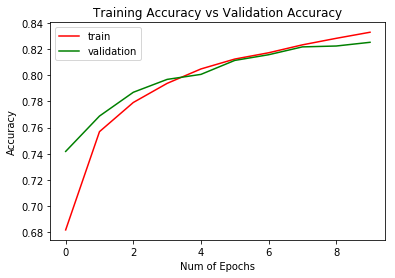

In [19]:
plt.figure(0)
plt.plot(training_accuracy,'r')
plt.plot(validation_accuracy,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

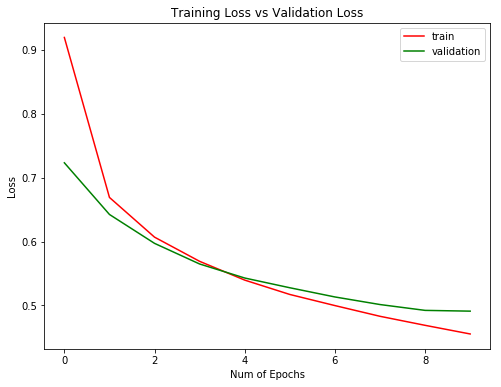

In [20]:
plt.figure(1)
plt.plot(training_error,'r')
plt.plot(validation_error,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [21]:
scores = model.evaluate(testX, testY, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 16.65%
MLP Accuracy on test set: 83.35%


In [22]:
scores = model.evaluate(trainX, trainY, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 16.62%
MLP Accuracy on test set: 83.38%


In [23]:
scores = model.evaluate(validationX, validationY, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 17.48%
MLP Accuracy on test set: 82.52%
